In [30]:
import json
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_json('../data/spiritedaway/imageSceneData.json')
df.head()

,colors,sceneNum,second
0,"[[131, 119, 88], [57, 54, 45], [183, 171, 162]]",0,249
1,"[[26, 24, 29], [157, 159, 146], [90, 94, 87], ...",0,261
2,"[[174, 33, 43], [176, 248, 68], [62, 23, 28], ...",0,507
3,"[[29, 21, 18], [108, 108, 112]]",0,513
4,"[[224, 189, 150], [44, 35, 30], [144, 124, 111]]",0,275


(747, 4, 3)
(4, 747, 3)


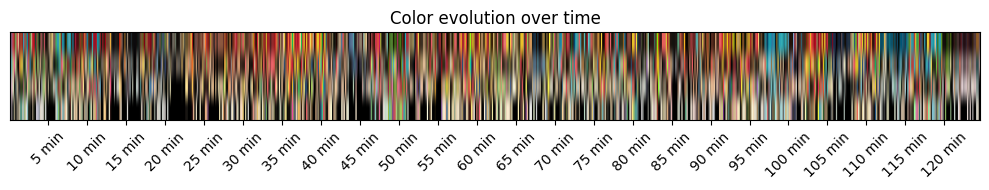

747


In [ ]:
import ast
import numpy as np
if isinstance(df["colors"].iloc[0], str):
    df["colors"] = df["colors"].apply(ast.literal_eval)
df = df.sort_values("second")
df.head()


# color_array = np.array([np.array(c) / 255.0 for c in df["colors"]])

color_list = []
for c in df["colors"]:
    while len(c) < 4:
        c.append([0,0,0])
    if len(c)>0:
        c = c[:4]  
    color_list.append(np.array(c)/ 255.0)
color_array =np.array(color_list)
print(color_array.shape)
# print(color_array)

arr = np.transpose(color_array, (1, 0, 2))
print(arr.shape)
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(arr, aspect="auto")
ax.set_yticks([])
seconds = df["second"].to_numpy()
tick_indices = [i for i, s in enumerate(seconds) if s % 30 == 0]
tick_labels = [f"{s//6:d} min" for s in seconds[tick_indices]]
ax.set_xticks(tick_indices)
ax.set_xticklabels(tick_labels, rotation=45)
ax.set_title("Spirited away colors through time")
plt.tight_layout()
plt.show()

print(np.max(df['second']))